<a href="https://colab.research.google.com/github/ProfKaromo/Data_Science_Codes/blob/main/Hypothesis_Testing_One_Sample_T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas  
# Read data, manipulate your data, select columns, basic stats, check empties.
data = pandas.read_csv("https://modcom.co.ke/data/datasets/schoolcleaned.csv", 
                       parse_dates=['bday','enrolldate', 'expgradate'])
#data.head(2)
# State Hypothesis
# H0: The mean score for reading  subject is equal to 70  - Null.
# H1: The mean score for reading  subject is not equal to 70 - Alternative.

In [2]:
from scipy.stats import ttest_1samp
statistic, pvalue = ttest_1samp(data['Reading'], popmean = 70)
# Confidence Level 95%, 5% is Risk
print('Pvalue ', pvalue)
print('Test Statistic ', statistic)
if pvalue < 0.05:
   print('Reject Null Hypothesis')
   
else:
   print('Fail to Reject Null Hypothesis')
# We Conclude, 
# We Reject the null hypothesis and accept the Alternative, that
# The mean score for reading  subject is not equal to 70.
# We check Outliers, Nomality.
# H0: The mean score for Sprint  subject is equal to 7  - Null.
# H1: The mean score for reading  subject is not equal to 7 - Alternative.


Pvalue  3.5051218910027395e-114
Test Statistic  32.28472944993415
Reject Null Hypothesis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


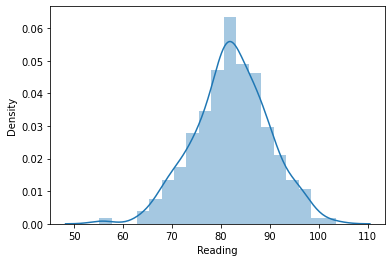

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(data['Reading'], kde=True)

In [4]:

from scipy.stats import shapiro
stats, pvalue = shapiro(data['Reading'])
if pvalue > 0.05:
   print('the data is normal')
else:
  print('the data is not normal')

the data is normal


In [5]:
data['Reading'].describe()

count    407.000000
mean      82.143873
std        7.588523
min       55.110000
25%       77.595000
50%       82.000000
75%       87.060000
max      103.620000
Name: Reading, dtype: float64

Max  101.25750000000001
Min  63.397499999999994


403

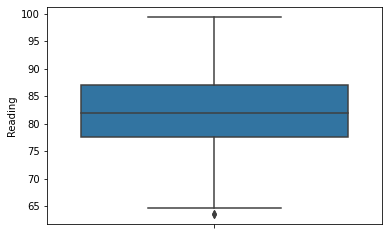

In [6]:
data['Reading'].describe()

lowerbound = 77.595000
upperbound = 87.060000
iqr = upperbound - lowerbound
max = upperbound +(1.5 * iqr)
min = lowerbound -(1.5 * iqr)
print('Max ', max)
print('Min ', min)
data = data[data['Reading'] < max]
data = data[data['Reading'] > min]
sns.boxplot(y = data['Reading'])

data['Reading'].count()

403

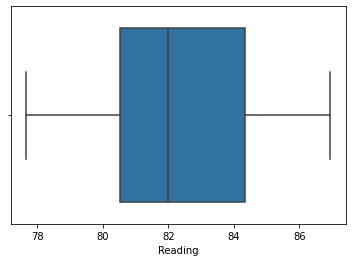

In [7]:
q_low = data["Reading"].quantile(0.25) # LowerBound
q_hi = data["Reading"].quantile(0.75)    # UpperBound
 
df_filtered = data[(data["Reading"] < q_hi) & (data["Reading"] > q_low)]  # Removing outlier for L and H
sns.boxplot(x='Reading', data = df_filtered)
data['Reading'].count()